In [1]:
import xarray as xr
import numpy as np

In [2]:
time_lim = ['1980','2010']

In [5]:
len(sst_dt_series)

144

In [7]:
var = 'sst'
filename = {}
filename['sst'] = '/projects/GEOCLIM/hengquan/models_stellar/AM4/hadisst/hadisst_sst.data.nc' 
ds = xr.open_dataset(filename['sst'])
print(ds)

time = ds.time 
# any background sst
sst = ds['sst'].sel(time=slice(time_lim[0], time_lim[1])) 
sst_month_clim = sst.groupby('time.month').mean('time')

da = sst_month_clim

sst_dt_series = np.arange(-1,10.1,1)*-1
sst_dt_series = np.repeat(sst_dt_series,12)
year_num = int(sst_dt_series.shape[0]/12)
da = xr.concat([da,]*year_num, dim='month')
da = da+sst_dt_series[:,None,None]
    
new_time = time.sel(time=slice('1999',f'{1999+year_num-1}'))
da = da.rename({'month':'time'})
da['time'] = new_time
da.attrs = sst.attrs

yr = xr.DataArray(da.time.dt.year.values, dims=['time'], coords=[new_time])
yr.attrs = dict(long_name='year')
mo = xr.DataArray(da.time.dt.month.values, dims=['time'], coords=[new_time])
mo.attrs = dict(long_name='month')
dy = xr.DataArray(da.time.dt.day.values, dims=['time'], coords=[new_time])
dy.attrs = dict(long_name='day')
nrecords = da.time.size
lon_bnds = ds.lon_bnds
lat_bnds = ds.lat_bnds
ds_new = xr.Dataset({var: da,
    'year': yr,
    'mon': mo,
    'day': dy,
    'lon_bnds': lon_bnds,
    'lat_bnds': lat_bnds,                 
    'nrecords': nrecords})
ds_new.attrs = ds.attrs 

bnddim,xdim,ydim,tdim ='bnds','lon','lat','time'
# nc_encoding = {bnddim:{'dtype': 'double', '_FillValue': False},
#             tdim:{'dtype': 'double', '_FillValue': False},
#             xdim:{'_FillValue': False},
#             ydim:{'_FillValue': False},
#             'lon_bnds':{'dtype':'float64', '_FillValue': False}, 
#             'lat_bnds':{'dtype':'float64', '_FillValue': False},
#             'sst':{'_FillValue': False},
#             'mon': {'dtype': 'float32', '_FillValue': False},
#             'day': {'dtype': 'float32', '_FillValue': False},
#             'year': {'dtype': 'float32', '_FillValue': False},
#             'nrecords': {'dtype': 'int32', '_FillValue': False},
#             }
#ds_new.to_netcdf('/projects/GEOCLIM/hengquan/models_stellar/AM4/hadisst/hadisst_sst_ctl.data.nc', unlimited_dims=tdim, encoding=nc_encoding)
filename  = f'hadisst_{var}.{time_lim[0]}_{time_lim[1]}.m1KpY.nc'
ds_new.to_netcdf(filename, unlimited_dims=tdim)


<xarray.Dataset>
Dimensions:   (lon: 360, bnds: 2, lat: 180, time: 1776, ncl4: 1)
Coordinates:
  * lon       (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * time      (time) datetime64[ns] 1869-01-16T12:00:00 ... 2016-12-16T12:00:00
Dimensions without coordinates: bnds, ncl4
Data variables:
    lon_bnds  (lon, bnds) float64 ...
    lat_bnds  (lat, bnds) float64 ...
    sst       (time, lat, lon) float32 ...
    mon       (time) float32 ...
    day       (time) float32 ...
    year      (time) float32 ...
    nrecords  (ncl4) int32 ...
Attributes: (12/35)
    CDI:                     Climate Data Interface version 1.7.2 (http://mpi...
    source:                  PCMDI-AMIP 1.1.0: Merged SST based on UK MetOffi...
    institution:             Program for Climate Model Diagnosis and Intercom...
    Conventions:             CF-1.7 CMIP-6.0
    activity_id:             input4MIPs
    comment:     

In [8]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray

In [9]:
ds_check = xr.open_dataset(filename)
# print(ds_check)

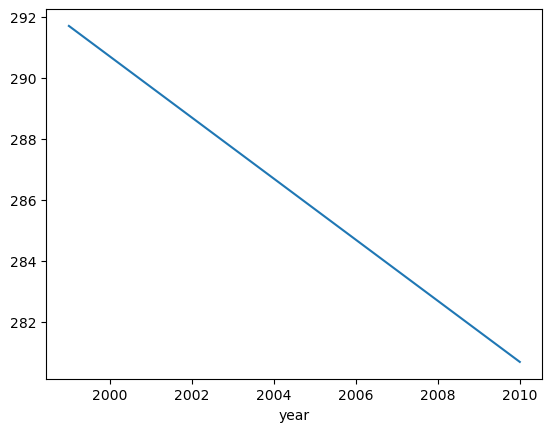

In [10]:
global_mean_xarray(ds_check.sst.groupby('time.year').mean('time')).plot()

In [11]:
new_time

<xarray.DataArray 'time' (time: 144)>
array(['1999-01-16T12:00:00.000000000', '1999-02-15T00:00:00.000000000',
       '1999-03-16T12:00:00.000000000', '1999-04-16T00:00:00.000000000',
       '1999-05-16T12:00:00.000000000', '1999-06-16T00:00:00.000000000',
       '1999-07-16T12:00:00.000000000', '1999-08-16T12:00:00.000000000',
       '1999-09-16T00:00:00.000000000', '1999-10-16T12:00:00.000000000',
       '1999-11-16T00:00:00.000000000', '1999-12-16T12:00:00.000000000',
       '2000-01-16T12:00:00.000000000', '2000-02-15T12:00:00.000000000',
       '2000-03-16T12:00:00.000000000', '2000-04-16T00:00:00.000000000',
       '2000-05-16T12:00:00.000000000', '2000-06-16T00:00:00.000000000',
       '2000-07-16T12:00:00.000000000', '2000-08-16T12:00:00.000000000',
       '2000-09-16T00:00:00.000000000', '2000-10-16T12:00:00.000000000',
       '2000-11-16T00:00:00.000000000', '2000-12-16T12:00:00.000000000',
       '2001-01-16T12:00:00.000000000', '2001-02-15T00:00:00.000000000',
       '2001-03-16T12:00:00.000000000', '2001-04-16T00:00:00.000000000',
       '2001-05-16T12:00:00.000000000', '2001-06-16T00:00:00.000000000',
       '2001-07-16T12:00:00.000000000', '2001-08-16T12:00:00.000000000',
       '2001-09-16T00:00:00.000000000', '2001-10-16T12:00:00.000000000',
       '2001-11-16T00:00:00.000000000', '2001-12-16T12:00:00.000000000',
       '2002-01-16T12:00:00.000000000', '2002-02-15T00:00:00.000000000',
       '2002-03-16T12:00:00.000000000', '2002-04-16T00:00:00.000000000',
       '2002-05-16T12:00:00.000000000', '2002-06-16T00:00:00.000000000',
       '2002-07-16T12:00:00.000000000', '2002-08-16T12:00:00.000000000',
       '2002-09-16T00:00:00.000000000', '2002-10-16T12:00:00.000000000',
       '2002-11-16T00:00:00.000000000', '2002-12-16T12:00:00.000000000',
       '2003-01-16T12:00:00.000000000', '2003-02-15T00:00:00.000000000',
       '2003-03-16T12:00:00.000000000', '2003-04-16T00:00:00.000000000',
       '2003-05-16T12:00:00.000000000', '2003-06-16T00:00:00.000000000',
       '2003-07-16T12:00:00.000000000', '2003-08-16T12:00:00.000000000',
       '2003-09-16T00:00:00.000000000', '2003-10-16T12:00:00.000000000',
       '2003-11-16T00:00:00.000000000', '2003-12-16T12:00:00.000000000',
       '2004-01-16T12:00:00.000000000', '2004-02-15T12:00:00.000000000',
       '2004-03-16T12:00:00.000000000', '2004-04-16T00:00:00.000000000',
       '2004-05-16T12:00:00.000000000', '2004-06-16T00:00:00.000000000',
       '2004-07-16T12:00:00.000000000', '2004-08-16T12:00:00.000000000',
       '2004-09-16T00:00:00.000000000', '2004-10-16T12:00:00.000000000',
       '2004-11-16T00:00:00.000000000', '2004-12-16T12:00:00.000000000',
       '2005-01-16T12:00:00.000000000', '2005-02-15T00:00:00.000000000',
       '2005-03-16T12:00:00.000000000', '2005-04-16T00:00:00.000000000',
       '2005-05-16T12:00:00.000000000', '2005-06-16T00:00:00.000000000',
       '2005-07-16T12:00:00.000000000', '2005-08-16T12:00:00.000000000',
       '2005-09-16T00:00:00.000000000', '2005-10-16T12:00:00.000000000',
       '2005-11-16T00:00:00.000000000', '2005-12-16T12:00:00.000000000',
       '2006-01-16T12:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-16T12:00:00.000000000', '2006-04-16T00:00:00.000000000',
       '2006-05-16T12:00:00.000000000', '2006-06-16T00:00:00.000000000',
       '2006-07-16T12:00:00.000000000', '2006-08-16T12:00:00.000000000',
       '2006-09-16T00:00:00.000000000', '2006-10-16T12:00:00.000000000',
       '2006-11-16T00:00:00.000000000', '2006-12-16T12:00:00.000000000',
       '2007-01-16T12:00:00.000000000', '2007-02-15T00:00:00.000000000',
       '2007-03-16T12:00:00.000000000', '2007-04-16T00:00:00.000000000',
       '2007-05-16T12:00:00.000000000', '2007-06-16T00:00:00.000000000',
       '2007-07-16T12:00:00.000000000', '2007-08-16T12:00:00.000000000',
       '2007-09-16T00:00:00.000000000', '2007-10-16T12:00:00.000000000',
       '2007-11-16T00:00:00.000000000', '2007-12-16T12:00:00.000000000',
       '2008-01-16T1

In [12]:
da

<xarray.DataArray 'sst' (time: 144, lat: 180, lon: 360)>
array([[[272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        ...,
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535]],

       [[272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
        [272.35998535, 272.35998535, 272.35998535, ..., 272.35998535,
         272.35998535, 272.35998535],
...
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535]],

       [[261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        ...,
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535],
        [261.35998535, 261.35998535, 261.35998535, ..., 261.35998535,
         261.35998535, 261.35998535]]])
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1999-01-16T12:00:00 ... 2010-12-16T12:00:00
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      Constructed mid-month Sea Surface Temperature
    units:          K
    comment:        this may differ from 'surface temperature' in regions of ...
    cell_methods:   area: areacello